## The voice of the social network  - Twitter Feed

This is a simple notebook to show how social media interact with the key words and get a quick insight from what is the trend on social media.

These are the key words that can be used in the Twitter API

- LQHomesMatter
- London & Quadrant
- Inside Housing
- Grenfell
- etc.

The notebook can be replicated with the following libaries downloaded from anaconda

- tweepy
- wordcloud
- stopword

https://anaconda.org/conda-forge/tweepy
https://anaconda.org/conda-forge/wordcloud

In [15]:
import tweepy           

In [16]:
#Authentication
CONSUMER_KEY= 'woVUqhu8TN0cpynxiS2UQELm3'
CONSUMER_SECRET ='wQlJTuTg7yACFiyLZj3x6jQRIjBdHI7799Sq69MV89tOHn5ODE'
ACCESS_TOKEN = '2790818165-1ftTRXtOtbDZ5uDO80iANUPpD7WRmu8k7Wn0KZH'
ACCESS_SECRET = 'UKt3fO05LYet34X1yO6UruBOSsQOPxDSrRe1BLS4Dqz3N'

In [17]:
# API's setup:
def twitter_setup():
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [18]:
#create an extractor object to search for tweets use 'blue plaques' keyword
extractor = twitter_setup()
fetched_tweets = extractor.search('LQHomesMatter', count = 5000)


In [19]:
type(fetched_tweets)

tweepy.models.SearchResults

In [20]:
import re 
import nltk
import os
from nltk.util import ngrams
import multiprocessing

In [21]:
#remove url link at the end of the tweets
def remove_url(tweet):
    head, sep, tail = tweet.partition('http')
    return (head)

In [22]:
#remove the picture link
def remove_piclink(tweet):
    head, sep, tail = tweet.partition('pic.twitter.com')
    return (head)

In [23]:
#remove the special character
def remove_char(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([^ ]+\.[^ ]+')", " ", tweet).split())

In [24]:
#remove number 
def remove_num(tweet):
    return re.sub("\S*\d\S*", "", tweet).strip()

In [25]:
textData=[]
for i in fetched_tweets:
    textData.append(i.text)
textData

['@LDNRentersUnion constantly gt bullied by @LQcontactus @LQHomesMatter we pay our rent however each month it runs in… https://t.co/IXdD2MTEFN',
 '@aclresident @natfednews @MetroUK @AsterGroupUK @Clarion_Group @emhgroup @HaltonHousing @LQHomesMatter @moat_sales… https://t.co/kSWzqrfSX7',
 'RT @NLC_2019: @aclresident @natfednews @MetroUK @AsterGroupUK @Clarion_Group @emhgroup @HaltonHousing @LQHomesMatter @moat_sales @NHGhousin…',
 'RT @aclresident: @natfednews @MetroUK @AsterGroupUK @Clarion_Group @emhgroup @HaltonHousing @LQHomesMatter @moat_sales @NHGhousing @Onward_…',
 'RT @NathanSingleton: Great to have so many of the young people, volunteers and residents with us today from \u2066@academycentral\u2069 thanks to fun…',
 '@aclresident @natfednews @MetroUK @AsterGroupUK @Clarion_Group @emhgroup @HaltonHousing @LQHomesMatter @moat_sales… https://t.co/UImpapYdCa',
 'RT @aclresident: @natfednews @MetroUK @AsterGroupUK @Clarion_Group @emhgroup @HaltonHousing @LQHomesMatter @moat_sales @

In [26]:
processed=[]
for i in textData:
    i=remove_url(i)
    i= remove_piclink(i)
    i=remove_char(i)
    i=remove_num(i)
    processed.append(i)

In [27]:
#word cloud visualisation about what people are talking about
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopset = set(stopwords.words('english'))


#remove the stopword and set the wordcloud counted by frequncy 
w2 = WordCloud(width=720, height=380,stopwords=stopset, max_words=150,collocations=False)
textPlot=textData

w2.generate(" ".join(list(textPlot)))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/richie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


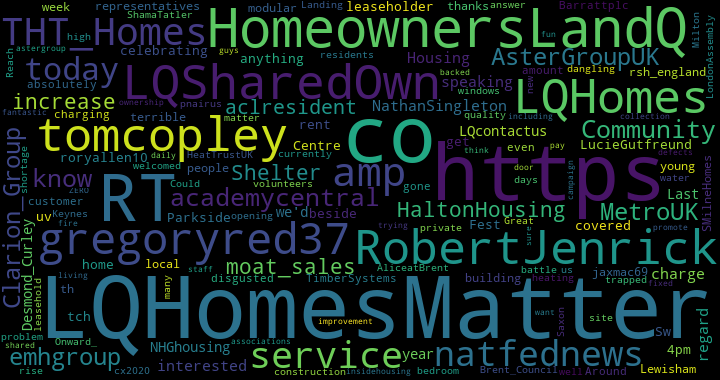

In [28]:
w2.to_image()